# Exploratory Data Analysis (EDA) notebook

# In the following notebook we perform an exploratory data analysis (EDA) on the Telco customer churn dataset. The EDA will include steps such as loading the dataset, performing data cleaning, visualizing the data with plots, and gaining insights from the data.


In [1]:
# EDA imports and display settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


In [2]:
# Load the cleaned dataset
customer_churn_df = pd.read_csv('/home/lenix/Desktop/C_Churn_Dataset/clean_df.csv')


In [3]:
# Numeric columns of interest
num_cols = ['tenure', 'monthly_charges', 'total_charges']

# Basic summary table: mean, median, std, min, max
summary = customer_churn_df[num_cols].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
summary = summary.rename(columns={'median': '50%'})  # label consistency
display(summary)



,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
median,29.000000,70.350000,1394.550000
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
max,72.000000,118.750000,8684.800000


In [4]:
# Mode (most frequent value) for numeric columns
modes = {col: customer_churn_df[col].mode().tolist() for col in num_cols}
print("Modes (may be multiple values):")
for col, m in modes.items():
    print(f" - {col}: {m}")


Modes (may be multiple values):
 - tenure: [1]
 - monthly_charges: [20.05]
 - total_charges: [0.0, 20.2]


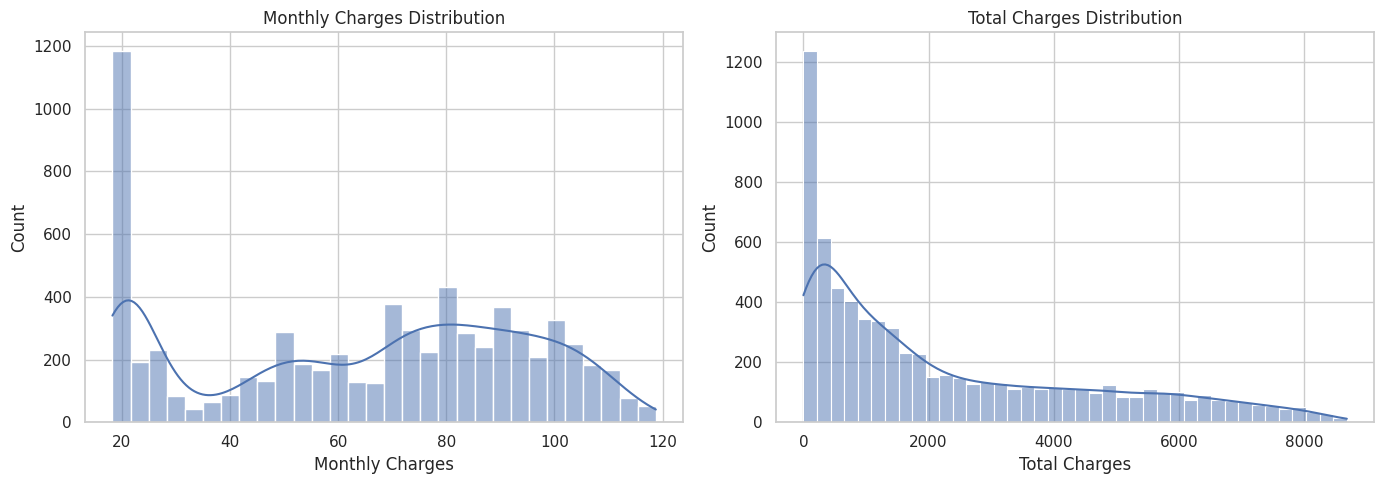

In [5]:
# Histograms with KDE for monthly and total charges
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(customer_churn_df['monthly_charges'], bins=30, kde=True)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')

plt.subplot(1,2,2)
sns.histplot(customer_churn_df['total_charges'], bins=40, kde=True)
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges')

plt.tight_layout()
plt.show()


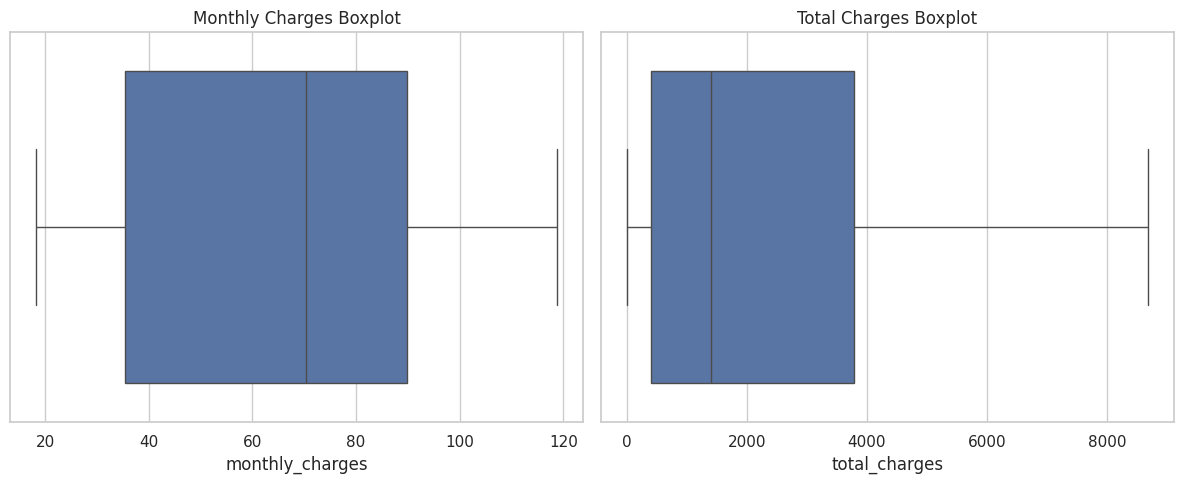

In [6]:
# Boxplots highlight extreme values
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=customer_churn_df['monthly_charges'])
plt.title('Monthly Charges Boxplot')

plt.subplot(1,2,2)
sns.boxplot(x=customer_churn_df['total_charges'])
plt.title('Total Charges Boxplot')

plt.tight_layout()
plt.show()


In [7]:
# Overall churn counts and proportion
churn_counts = customer_churn_df['churn'].value_counts()
churn_props = customer_churn_df['churn'].value_counts(normalize=True) * 100
print("Churn counts:")
print(churn_counts)
print("\nChurn proportions (%):")
print(churn_props.round(2))



Churn counts:
churn
False    5174
True     1869
Name: count, dtype: int64

Churn proportions (%):
churn
False    73.46
True     26.54
Name: proportion, dtype: float64


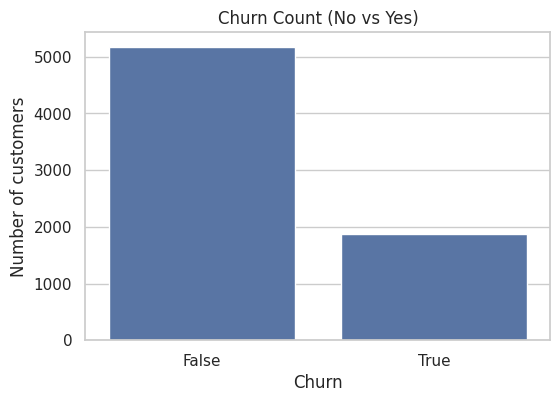

In [8]:
# Bar plot for churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=customer_churn_df)
plt.title('Churn Count (No vs Yes)')
plt.xlabel('Churn')
plt.ylabel('Number of customers')
plt.show()



Churn rate by contract (row %):


churn,False,True
contract,,
Month-to-month,57.29,42.71
One-year,88.73,11.27
Two-year,97.17,2.83


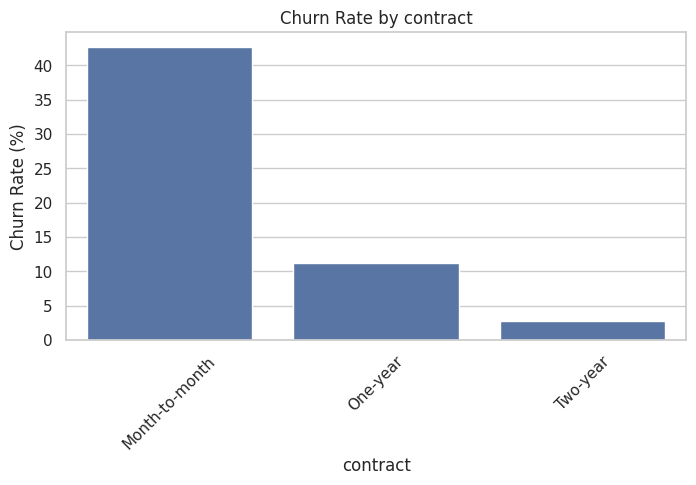


Churn rate by internet_service (row %):


churn,False,True
internet_service,,
DSL,81.04,18.96
Fiber-optic,58.11,41.89
No,92.60,7.40


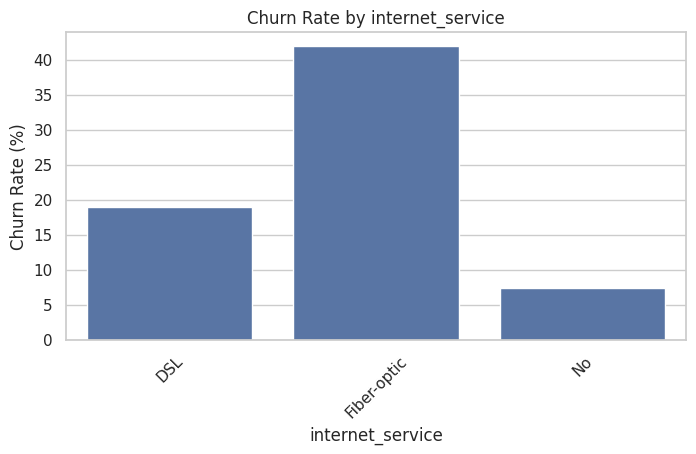


Churn rate by payment_method (row %):


churn,False,True
payment_method,,
Bank-transfer-(automatic),83.29,16.71
Credit-card-(automatic),84.76,15.24
Electronic-check,54.71,45.29
Mailed-check,80.89,19.11


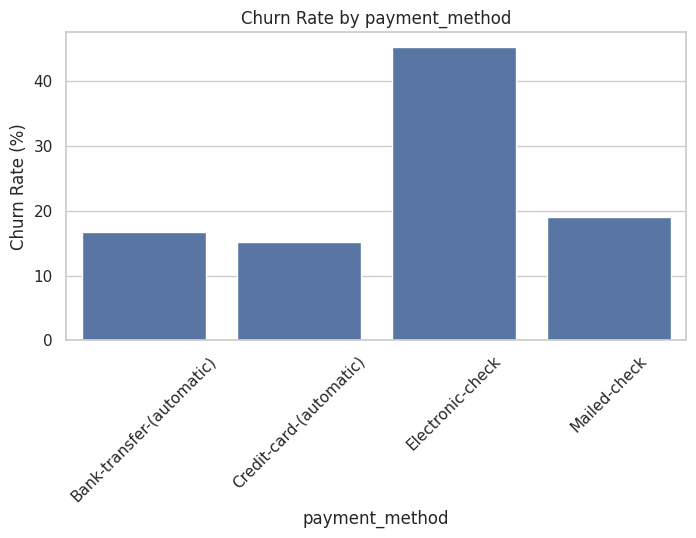

In [10]:
# Helpful breakdowns: churn rate by contract, internet service, payment method
cat_vars = ['contract', 'internet_service', 'payment_method']

for col in cat_vars:
    ct = pd.crosstab(customer_churn_df[col], customer_churn_df['churn'], normalize='index') * 100  # row-wise percent
    print(f"\nChurn rate by {col} (row %):")
    display(ct.round(2))

    # Barplot of churn rate
    plt.figure(figsize=(8,4))
    sns.barplot(x=ct.index, y=ct[True])
    plt.ylabel('Churn Rate (%)')
    plt.title(f'Churn Rate by {col}')
    plt.xticks(rotation=45)
    plt.show()